# PHÂN TÍCH DỮ LIỆU CHƯƠNG TRÌNH HỌC AI

Notebook này phân tích dữ liệu từ file `combined_data.json` để:
- Kiểm tra các trường có giá trị null
- Trực quan hóa phân phối dữ liệu
- Phân tích chất lượng dữ liệu

In [1]:
# Import các thư viện cần thiết
import json
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter, defaultdict
import warnings
warnings.filterwarnings('ignore')

# Thiết lập hiển thị tiếng Việt
plt.rcParams['font.family'] = 'DejaVu Sans'
sns.set_style("whitegrid")
plt.rcParams['figure.figsize'] = (12, 8)

print("Đã import thành công các thư viện cần thiết!")

Đã import thành công các thư viện cần thiết!


In [2]:
# Tải dữ liệu từ file JSON
print("Đang tải dữ liệu...")

try:
    with open('Data/combined_data.json', 'r', encoding='utf-8') as f:
        data = json.load(f)
    
    print(f"Đã tải thành công dữ liệu!")
    print(f"Loại dữ liệu: {type(data)}")
    
    # Lấy danh sách syllabuses
    if isinstance(data, dict) and 'syllabuses' in data:
        syllabuses = data['syllabuses']
        print(f"Chương trình học: {data.get('major_code_input', 'Unknown')}")
        print(f"Tiêu đề: {data.get('curriculum_title_on_page', 'Unknown')}")
    elif isinstance(data, list):
        syllabuses = data
    else:
        syllabuses = [data]
    
    print(f"Số lượng môn học: {len(syllabuses)}")
    
except Exception as e:
    print(f"Lỗi khi đọc file: {e}")
    syllabuses = []

Đang tải dữ liệu...
Đã tải thành công dữ liệu!
Loại dữ liệu: <class 'dict'>
Chương trình học: AI
Tiêu đề: Curriculum for AI
Số lượng môn học: 45


In [3]:
# Khám phá cấu trúc dữ liệu
print("CẤU TRÚC DỮ LIỆU:")
print("=" * 50)

if syllabuses:
    sample_syllabus = syllabuses[0]
    print(f"Các trường chính trong syllabus:")
    for key in sample_syllabus.keys():
        print(f"- {key}")
    
    if 'metadata' in sample_syllabus:
        print(f"\nCác trường trong metadata:")
        for key in sample_syllabus['metadata'].keys():
            print(f"- {key}")
    
    print(f"\nThông tin mẫu về môn học đầu tiên:")
    if 'metadata' in sample_syllabus:
        meta = sample_syllabus['metadata']
        print(f"- Mã môn: {meta.get('subject_code_on_page', 'N/A')}")
        print(f"- Tên môn: {meta.get('course_name_from_curriculum', 'N/A')}")
        print(f"- Học kỳ: {meta.get('semester_from_curriculum', 'N/A')}")
        print(f"- Tín chỉ: {meta.get('credits', 'N/A')}")

CẤU TRÚC DỮ LIỆU:
Các trường chính trong syllabus:
- metadata
- materials
- learning_outcomes
- schedule
- assessments
- has_download_materials_button

Các trường trong metadata:
- syllabus_url
- syllabus_id_from_url
- course_id
- course_name_from_curriculum
- semester_from_curriculum
- combo_name_from_curriculum
- combo_short_name_from_curriculum
- title
- english_title
- syllabus_id
- syllabus_code
- subject_code_on_page
- credits
- degree_level
- time_allocation
- prerequisites
- description
- student_tasks
- tools
- scoring_scale
- min_avg_mark_to_pass
- is_approved
- is_active
- decision_no
- approved_date
- note
- course_type_guess

Thông tin mẫu về môn học đầu tiên:
- Mã môn: CSI106
- Tên môn: Introduction to Computer Science_Nhập môn khoa học máy tính
- Học kỳ: 1
- Tín chỉ: 3


In [4]:
# Phân tích giá trị NULL và EMPTY
print("PHÂN TÍCH GIÁ TRỊ NULL VÀ EMPTY")
print("=" * 50)

# Thu thập tất cả các trường metadata
all_metadata_fields = set()
for syllabus in syllabuses:
    if 'metadata' in syllabus:
        all_metadata_fields.update(syllabus['metadata'].keys())

# Phân tích từng trường
null_analysis = []

for field in sorted(all_metadata_fields):
    null_count = 0
    empty_count = 0
    total_count = len(syllabuses)
    
    for syllabus in syllabuses:
        if 'metadata' in syllabus:
            value = syllabus['metadata'].get(field, None)
            
            if value is None:
                null_count += 1
            elif isinstance(value, str) and value.strip() == "":
                empty_count += 1
            elif str(value).strip() == "":
                empty_count += 1
        else:
            null_count += 1
    
    null_analysis.append({
        'field': field,
        'null_count': null_count,
        'empty_count': empty_count,
        'total_count': total_count,
        'null_percent': (null_count / total_count) * 100,
        'empty_percent': (empty_count / total_count) * 100,
        'valid_percent': ((total_count - null_count - empty_count) / total_count) * 100
    })

# Tạo DataFrame
df_null_analysis = pd.DataFrame(null_analysis)
df_null_analysis = df_null_analysis.round(2)

print("Thống kê NULL và EMPTY theo trường:")
print(df_null_analysis[['field', 'null_count', 'empty_count', 'null_percent', 'empty_percent', 'valid_percent']].to_string(index=False))

# Hiển thị các trường có vấn đề
problematic_fields = df_null_analysis[(df_null_analysis['null_percent'] > 0) | (df_null_analysis['empty_percent'] > 0)]
if len(problematic_fields) > 0:
    print(f"\nCác trường có giá trị NULL hoặc EMPTY:")
    print(problematic_fields[['field', 'null_percent', 'empty_percent']].to_string(index=False))
else:
    print("\nKhông có trường nào có giá trị NULL hoặc EMPTY!")

PHÂN TÍCH GIÁ TRỊ NULL VÀ EMPTY
Thống kê NULL và EMPTY theo trường:
                           field  null_count  empty_count  null_percent  empty_percent  valid_percent
                   approved_date           0            0           0.0           0.00         100.00
      combo_name_from_curriculum           0           35           0.0          77.78          22.22
combo_short_name_from_curriculum           0           35           0.0          77.78          22.22
                       course_id           0            0           0.0           0.00         100.00
     course_name_from_curriculum           0            0           0.0           0.00         100.00
               course_type_guess           0            0           0.0           0.00         100.00
                         credits           0            0           0.0           0.00         100.00
                     decision_no           0            0           0.0           0.00         100.00
              

In [5]:
# Phân tích phân phối theo học kỳ và tín chỉ
print("PHÂN TÍCH PHÂN PHỐI THEO HỌC KỲ VÀ TÍN CHỈ")
print("=" * 50)

semester_data = []
credit_data = []

for syllabus in syllabuses:
    if 'metadata' in syllabus:
        meta = syllabus['metadata']
        
        # Dữ liệu học kỳ
        semester = meta.get('semester_from_curriculum', 'Unknown')
        semester_data.append(semester)
        
        # Dữ liệu tín chỉ
        credits = meta.get('credits', '0')
        try:
            credit_num = int(credits)
            credit_data.append(credit_num)
        except:
            credit_data.append(0)

# Thống kê học kỳ
semester_counts = Counter(semester_data)
print("Phân phối môn học theo học kỳ:")
for semester in sorted(semester_counts.keys()):
    print(f"Học kỳ {semester}: {semester_counts[semester]} môn")

# Thống kê tín chỉ
credit_counts = Counter(credit_data)
print("\nPhân phối môn học theo số tín chỉ:")
for credits in sorted(credit_counts.keys()):
    print(f"{credits} tín chỉ: {credit_counts[credits]} môn")

print(f"\nTổng số tín chỉ trong chương trình: {sum(credit_data)}")
print(f"Trung bình tín chỉ mỗi môn: {np.mean(credit_data):.2f}")

PHÂN TÍCH PHÂN PHỐI THEO HỌC KỲ VÀ TÍN CHỈ
Phân phối môn học theo học kỳ:
Học kỳ 1: 5 môn
Học kỳ 2: 5 môn
Học kỳ 3: 5 môn
Học kỳ 4: 4 môn
Học kỳ 5: 8 môn
Học kỳ 6: 2 môn
Học kỳ 7: 6 môn
Học kỳ 8: 7 môn
Học kỳ 9: 3 môn

Phân phối môn học theo số tín chỉ:
2 tín chỉ: 4 môn
3 tín chỉ: 39 môn
6 tín chỉ: 1 môn
10 tín chỉ: 1 môn

Tổng số tín chỉ trong chương trình: 141
Trung bình tín chỉ mỗi môn: 3.13


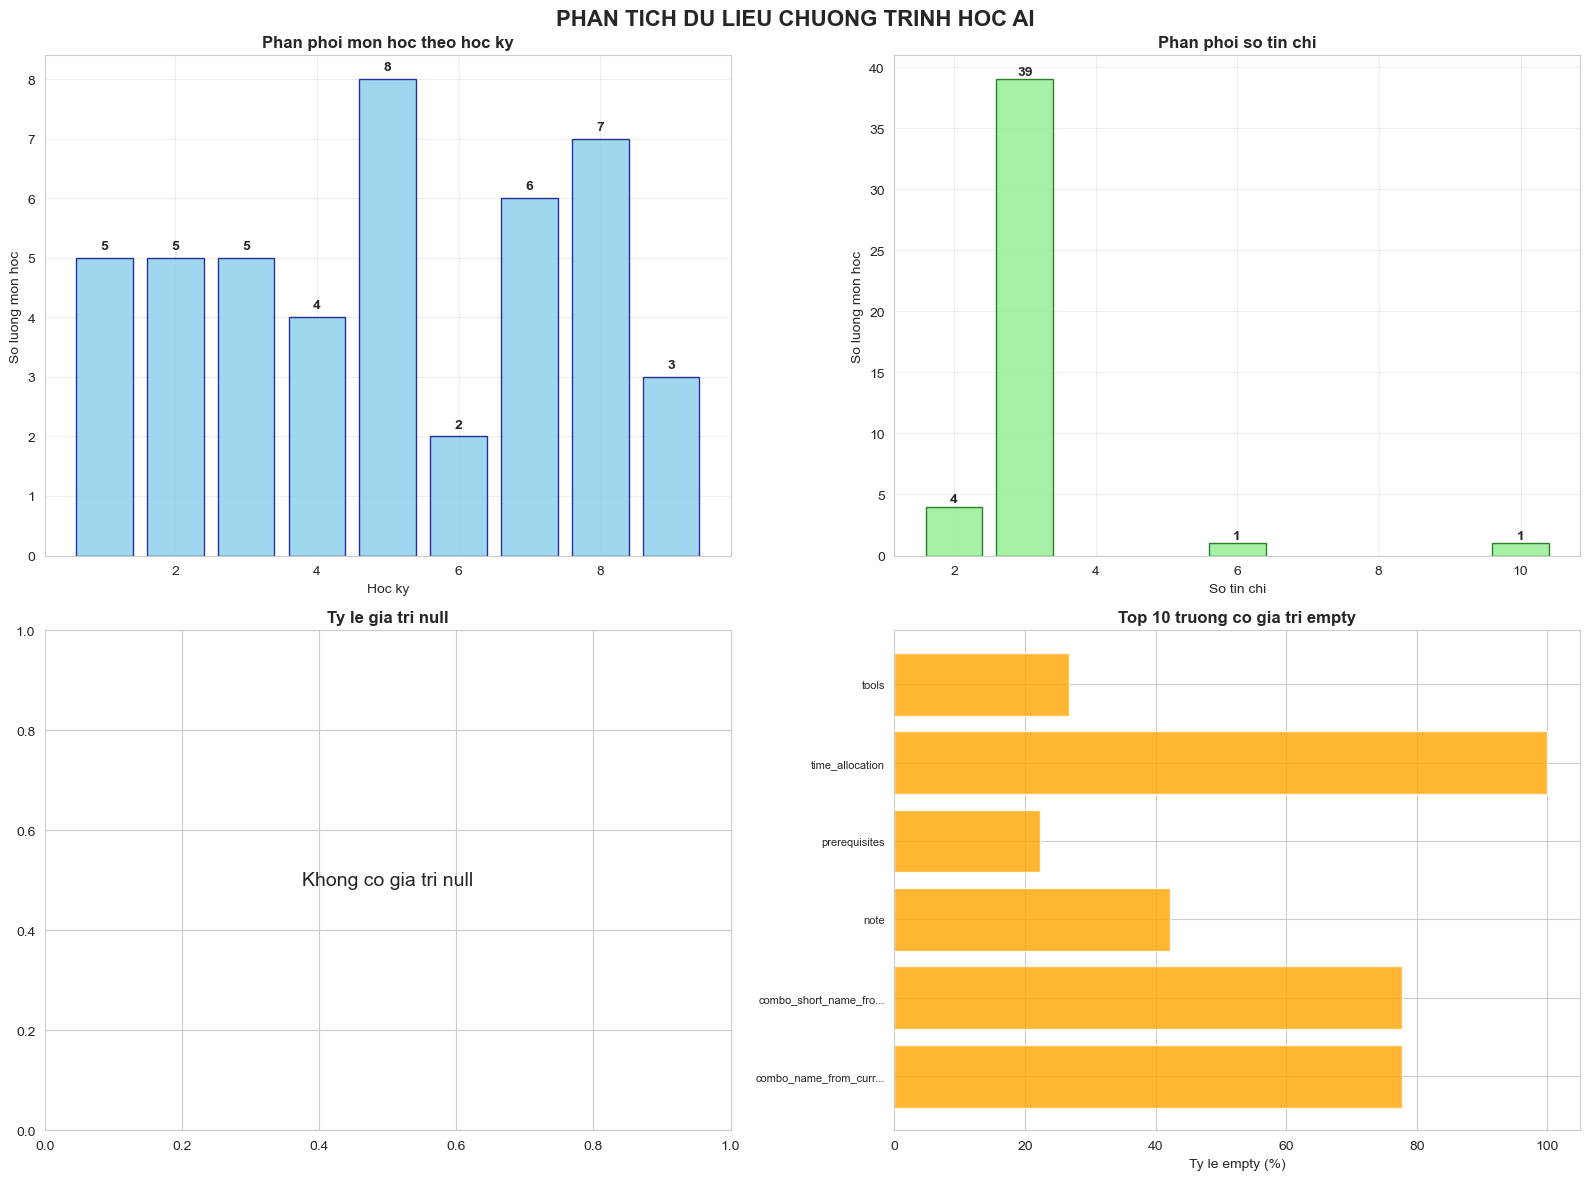

In [6]:
# Trực quan hóa - Biểu đồ phân phối học kỳ
fig, axes = plt.subplots(2, 2, figsize=(16, 12))
fig.suptitle('PHAN TICH DU LIEU CHUONG TRINH HOC AI', fontsize=16, fontweight='bold')

# Biểu đồ 1: Phân phối môn học theo học kỳ
ax1 = axes[0, 0]
semesters = list(semester_counts.keys())
counts = list(semester_counts.values())

bars1 = ax1.bar(semesters, counts, color='skyblue', edgecolor='navy', alpha=0.8)
ax1.set_title('Phan phoi mon hoc theo hoc ky', fontsize=12, fontweight='bold')
ax1.set_xlabel('Hoc ky')
ax1.set_ylabel('So luong mon hoc')
ax1.grid(True, alpha=0.3)

# Thêm giá trị lên trên các cột
for bar in bars1:
    height = bar.get_height()
    ax1.text(bar.get_x() + bar.get_width()/2., height + 0.1,
            f'{int(height)}', ha='center', va='bottom', fontweight='bold')

# Biểu đồ 2: Phân phối tín chỉ
ax2 = axes[0, 1]
credits = list(credit_counts.keys())
credit_freq = list(credit_counts.values())

bars2 = ax2.bar(credits, credit_freq, color='lightgreen', edgecolor='darkgreen', alpha=0.8)
ax2.set_title('Phan phoi so tin chi', fontsize=12, fontweight='bold')
ax2.set_xlabel('So tin chi')
ax2.set_ylabel('So luong mon hoc')
ax2.grid(True, alpha=0.3)

for bar in bars2:
    height = bar.get_height()
    ax2.text(bar.get_x() + bar.get_width()/2., height + 0.1,
            f'{int(height)}', ha='center', va='bottom', fontweight='bold')

# Biểu đồ 3: Tỷ lệ NULL values
ax3 = axes[1, 0]
null_fields = df_null_analysis[df_null_analysis['null_percent'] > 0].head(10)

if len(null_fields) > 0:
    y_pos = range(len(null_fields))
    ax3.barh(y_pos, null_fields['null_percent'], color='salmon', alpha=0.8)
    ax3.set_yticks(y_pos)
    ax3.set_yticklabels([field[:20] + '...' if len(field) > 20 else field for field in null_fields['field']], fontsize=8)
    ax3.set_xlabel('Ty le null (%)')
    ax3.set_title('Top 10 truong co gia tri null', fontsize=12, fontweight='bold')
else:
    ax3.text(0.5, 0.5, 'Khong co gia tri null', 
            ha='center', va='center', transform=ax3.transAxes, fontsize=14)
    ax3.set_title('Ty le gia tri null', fontsize=12, fontweight='bold')

# Biểu đồ 4: Tỷ lệ EMPTY values
ax4 = axes[1, 1]
empty_fields = df_null_analysis[df_null_analysis['empty_percent'] > 0].head(10)

if len(empty_fields) > 0:
    y_pos = range(len(empty_fields))
    ax4.barh(y_pos, empty_fields['empty_percent'], color='orange', alpha=0.8)
    ax4.set_yticks(y_pos)
    ax4.set_yticklabels([field[:20] + '...' if len(field) > 20 else field for field in empty_fields['field']], fontsize=8)
    ax4.set_xlabel('Ty le empty (%)')
    ax4.set_title('Top 10 truong co gia tri empty', fontsize=12, fontweight='bold')
else:
    ax4.text(0.5, 0.5, 'Khong co gia tri empty', 
            ha='center', va='center', transform=ax4.transAxes, fontsize=14)
    ax4.set_title('Ty le gia tri empty', fontsize=12, fontweight='bold')

plt.tight_layout()
plt.show()

In [7]:
# Phân tích materials và assessments
print("PHÂN TÍCH TÀI LIỆU VÀ ĐÁNH GIÁ")
print("=" * 50)

# Thống kê materials
material_stats = {
    'total_materials': 0,
    'main_materials': 0,
    'hard_copy': 0,
    'online': 0,
    'courses_with_materials': 0
}

# Thống kê assessments
assessment_types = Counter()
assessment_weights = []

for syllabus in syllabuses:
    # Phân tích materials
    if 'materials' in syllabus and syllabus['materials']:
        materials = syllabus['materials']
        material_stats['courses_with_materials'] += 1
        material_stats['total_materials'] += len(materials)
        
        for material in materials:
            if material.get('is_main_material', False):
                material_stats['main_materials'] += 1
            if material.get('is_hard_copy', False):
                material_stats['hard_copy'] += 1
            if material.get('is_online', False):
                material_stats['online'] += 1
    
    # Phân tích assessments
    if 'assessments' in syllabus and syllabus['assessments']:
        assessments = syllabus['assessments']
        for assessment in assessments:
            category = assessment.get('category', 'Unknown')
            assessment_types[category] += 1
            
            # Lấy trọng số
            weight = assessment.get('weight', '0')
            try:
                weight_num = float(weight)
                assessment_weights.append(weight_num)
            except:
                pass

print("THỐNG KÊ TÀI LIỆU:")
for key, value in material_stats.items():
    print(f"- {key}: {value}")

print(f"\nTrung bình tài liệu mỗi môn: {material_stats['total_materials'] / len(syllabuses):.2f}")

print("\nTHỐNG KÊ LOẠI ĐÁNH GIÁ:")
for assessment_type, count in assessment_types.most_common():
    print(f"- {assessment_type}: {count} lần")

if assessment_weights:
    print(f"\nTrung bình trọng số đánh giá: {np.mean(assessment_weights):.2f}%")
    print(f"Tổng trọng số trung bình mỗi môn: {sum(assessment_weights) / len(syllabuses):.2f}%")

PHÂN TÍCH TÀI LIỆU VÀ ĐÁNH GIÁ
THỐNG KÊ TÀI LIỆU:
- total_materials: 310
- main_materials: 153
- hard_copy: 57
- online: 212
- courses_with_materials: 45

Trung bình tài liệu mỗi môn: 6.89

THỐNG KÊ LOẠI ĐÁNH GIÁ:
- Final exam: 29 lần
- Assignment: 15 lần
- Progress test 1: 10 lần
- Progress test 2: 10 lần
- Progress Test: 6 lần
- Assignment 1: 6 lần
- Assignment 2: 6 lần
- Progress tests: 6 lần
- Progress test: 5 lần
- Participation: 5 lần
- Lab: 4 lần
- Final Exam: 4 lần
- TE: 4 lần
- Lab 2: 4 lần
- Assignment 3: 4 lần
- Practical Exam: 3 lần
- Lab 1: 3 lần
- Progress test 3: 3 lần
- PE: 3 lần
- Lab 3: 3 lần
- Lab 4: 3 lần
- Assignments/Exercises: 2 lần
- Kiểm tra nhỏ (small test): 2 lần
- Tham gia giờ học tại giảng đường: 2 lần
- Thi cuối kỳ: 2 lần
- Thi cuối kỳ: Nói: 2 lần
- Computer Project: 2 lần
- Lab1: 2 lần
- lab2: 2 lần
- lab3: 2 lần
- Assignment 4: 2 lần
- Group presentation: 1 lần
- Theoretical Exam (TE): 1 lần
- Exercises: 1 lần
- Practical exam: 1 lần
- Kiểm tra giữa kì: 

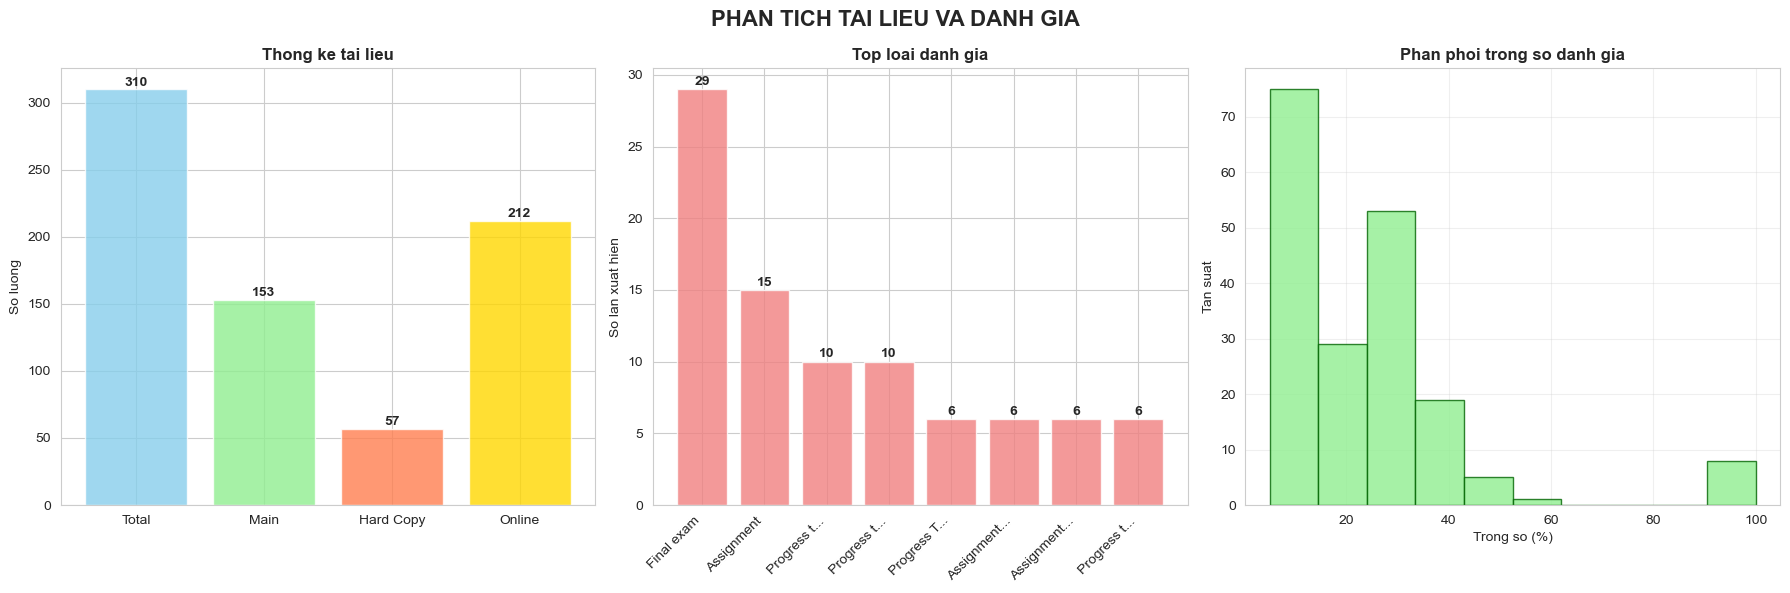

In [8]:
# Trực quan hóa materials và assessments
fig, axes = plt.subplots(1, 3, figsize=(18, 6))
fig.suptitle('PHAN TICH TAI LIEU VA DANH GIA', fontsize=16, fontweight='bold')

# Biểu đồ 1: Thống kê materials
ax1 = axes[0]
material_labels = ['Total', 'Main', 'Hard Copy', 'Online']
material_values = [material_stats['total_materials'], material_stats['main_materials'], 
                  material_stats['hard_copy'], material_stats['online']]

bars = ax1.bar(material_labels, material_values, color=['skyblue', 'lightgreen', 'coral', 'gold'], alpha=0.8)
ax1.set_title('Thong ke tai lieu', fontsize=12, fontweight='bold')
ax1.set_ylabel('So luong')

for bar in bars:
    height = bar.get_height()
    ax1.text(bar.get_x() + bar.get_width()/2., height + 0.5,
            f'{int(height)}', ha='center', va='bottom', fontweight='bold')

# Biểu đồ 2: Top loại đánh giá
ax2 = axes[1]
top_assessments = assessment_types.most_common(8)
if top_assessments:
    assessment_names = [item[0] for item in top_assessments]
    assessment_counts = [item[1] for item in top_assessments]
    
    bars = ax2.bar(range(len(assessment_names)), assessment_counts, 
                   color='lightcoral', alpha=0.8)
    ax2.set_title('Top loai danh gia', fontsize=12, fontweight='bold')
    ax2.set_ylabel('So lan xuat hien')
    ax2.set_xticks(range(len(assessment_names)))
    ax2.set_xticklabels([name[:10] + '...' if len(name) > 10 else name for name in assessment_names], 
                       rotation=45, ha='right')
    
    for bar in bars:
        height = bar.get_height()
        ax2.text(bar.get_x() + bar.get_width()/2., height + 0.1,
                f'{int(height)}', ha='center', va='bottom', fontweight='bold')

# Biểu đồ 3: Phân phối trọng số đánh giá
ax3 = axes[2]
if assessment_weights:
    ax3.hist(assessment_weights, bins=10, color='lightgreen', alpha=0.8, edgecolor='darkgreen')
    ax3.set_title('Phan phoi trong so danh gia', fontsize=12, fontweight='bold')
    ax3.set_xlabel('Trong so (%)')
    ax3.set_ylabel('Tan suat')
    ax3.grid(True, alpha=0.3)
else:
    ax3.text(0.5, 0.5, 'Khong co du lieu trong so', 
            ha='center', va='center', transform=ax3.transAxes, fontsize=12)

plt.tight_layout()
plt.show()

In [9]:
# Tạo báo cáo tóm tắt chi tiết
print("BÁO CÁO TÓM TẮT CHI TIẾT")
print("=" * 60)

# Thông tin tổng quan
total_courses = len(syllabuses)
total_semesters = len(set(semester_data))
total_credits = sum(credit_data)

print(f"1. THÔNG TIN TỔNG QUAN:")
print(f"   - Tổng số môn học: {total_courses}")
print(f"   - Số học kỳ: {total_semesters}")
print(f"   - Tổng số tín chỉ: {total_credits}")
print(f"   - Trung bình tín chỉ/môn: {total_credits/total_courses:.2f}")

# Chất lượng dữ liệu
fields_with_nulls = len(df_null_analysis[df_null_analysis['null_percent'] > 0])
fields_with_empties = len(df_null_analysis[df_null_analysis['empty_percent'] > 0])
total_fields = len(df_null_analysis)

print(f"\n2. CHẤT LƯỢNG DỮ LIỆU:")
print(f"   - Tổng số trường: {total_fields}")
print(f"   - Trường có NULL: {fields_with_nulls} ({fields_with_nulls/total_fields*100:.1f}%)")
print(f"   - Trường có EMPTY: {fields_with_empties} ({fields_with_empties/total_fields*100:.1f}%)")

# Phân phối học tập
max_semester = max(semester_counts, key=semester_counts.get)
max_courses_in_semester = semester_counts[max_semester]

print(f"\n3. PHÂN PHỐI HỌC TẬP:")
print(f"   - Học kỳ có nhiều môn nhất: Học kỳ {max_semester} ({max_courses_in_semester} môn)")

for semester in sorted(semester_counts.keys()):
    semester_credits = sum([credit_data[i] for i, sem in enumerate(semester_data) if sem == semester])
    print(f"   - Học kỳ {semester}: {semester_counts[semester]} môn, {semester_credits} tín chỉ")

# Tài liệu và đánh giá
print(f"\n4. TÀI LIỆU VÀ ĐÁNH GIÁ:")
print(f"   - Môn có tài liệu: {material_stats['courses_with_materials']}/{total_courses} ({material_stats['courses_with_materials']/total_courses*100:.1f}%)")
print(f"   - Tổng tài liệu: {material_stats['total_materials']}")
print(f"   - Tài liệu chính: {material_stats['main_materials']}")
print(f"   - Loại đánh giá phổ biến nhất: {assessment_types.most_common(1)[0][0] if assessment_types else 'N/A'}")

print(f"\n" + "=" * 60)
print("KẾT THÚC PHÂN TÍCH DỮ LIỆU")

BÁO CÁO TÓM TẮT CHI TIẾT
1. THÔNG TIN TỔNG QUAN:
   - Tổng số môn học: 45
   - Số học kỳ: 9
   - Tổng số tín chỉ: 141
   - Trung bình tín chỉ/môn: 3.13

2. CHẤT LƯỢNG DỮ LIỆU:
   - Tổng số trường: 27
   - Trường có NULL: 0 (0.0%)
   - Trường có EMPTY: 6 (22.2%)

3. PHÂN PHỐI HỌC TẬP:
   - Học kỳ có nhiều môn nhất: Học kỳ 5 (8 môn)
   - Học kỳ 1: 5 môn, 15 tín chỉ
   - Học kỳ 2: 5 môn, 15 tín chỉ
   - Học kỳ 3: 5 môn, 15 tín chỉ
   - Học kỳ 4: 4 môn, 12 tín chỉ
   - Học kỳ 5: 8 môn, 27 tín chỉ
   - Học kỳ 6: 2 môn, 13 tín chỉ
   - Học kỳ 7: 6 môn, 18 tín chỉ
   - Học kỳ 8: 7 môn, 20 tín chỉ
   - Học kỳ 9: 3 môn, 6 tín chỉ

4. TÀI LIỆU VÀ ĐÁNH GIÁ:
   - Môn có tài liệu: 45/45 (100.0%)
   - Tổng tài liệu: 310
   - Tài liệu chính: 153
   - Loại đánh giá phổ biến nhất: Final exam

KẾT THÚC PHÂN TÍCH DỮ LIỆU


In [10]:
# Export kết quả phân tích
print("XUẤT KẾT QUẢ PHÂN TÍCH")
print("=" * 40)

# Tạo summary DataFrame
summary_data = []
for syllabus in syllabuses:
    if 'metadata' in syllabus:
        meta = syllabus['metadata']
        row = {
            'course_code': meta.get('subject_code_on_page', ''),
            'course_name': meta.get('course_name_from_curriculum', ''),
            'semester': meta.get('semester_from_curriculum', ''),
            'credits': meta.get('credits', ''),
            'prerequisites': meta.get('prerequisites', ''),
            'has_materials': len(syllabus.get('materials', [])) > 0,
            'materials_count': len(syllabus.get('materials', [])),
            'assessments_count': len(syllabus.get('assessments', [])),
            'has_schedule': len(syllabus.get('schedule', [])) > 0
        }
        summary_data.append(row)

df_summary = pd.DataFrame(summary_data)

# Lưu kết quả
try:
    df_summary.to_csv('course_analysis_summary.csv', index=False, encoding='utf-8-sig')
    df_null_analysis.to_csv('null_analysis_report.csv', index=False, encoding='utf-8-sig')
    print("Đã xuất thành công:")
    print("- course_analysis_summary.csv")
    print("- null_analysis_report.csv")
except Exception as e:
    print(f"Lỗi khi xuất file: {e}")

# Hiển thị preview
print("\nPreview dữ liệu tóm tắt:")
print(df_summary.head().to_string(index=False))

XUẤT KẾT QUẢ PHÂN TÍCH
Đã xuất thành công:
- course_analysis_summary.csv
- null_analysis_report.csv

Preview dữ liệu tóm tắt:
course_code                                                     course_name  semester credits prerequisites  has_materials  materials_count  assessments_count  has_schedule
     CSI106     Introduction to Computer Science_Nhập môn khoa học máy tính         1       3                         True                4                  4          True
     MAD101                               Discrete mathematics_Toán rời rạc         1       3          None           True                6                  3          True
     MAE101             Mathematics for Engineering_Toán cho ngành kỹ thuật         1       3          None           True               12                  3          True
     PFP191 Programming Fundamentals with Python_Cơ sở lập trình với Python         1       3                         True                4                  5          True
    SSL10